<a href="https://colab.research.google.com/github/johnson7543/crypto_prediction/blob/main/cryto_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
crypto = 'ETH-USD'
start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

# data = web.DataReader(company, 'yahoo', start, end)
data = web.DataReader(crypto,'yahoo', start, end)
print(data)

                  High         Low  ...      Volume   Adj Close
Date                                ...                        
2015-08-06    3.536610    2.521120  ...      164329    2.772120
2015-08-07    2.798810    0.714725  ...      674188    0.753325
2015-08-08    0.879810    0.629191  ...      532170    0.701897
2015-08-09    0.729854    0.636546  ...      405283    0.708448
2015-08-10    1.131410    0.663235  ...     1463100    1.067860
...                ...         ...  ...         ...         ...
2019-12-29  136.811203  127.997658  ...  9708776786  134.757980
2019-12-30  136.757355  131.545563  ...  9796951716  132.633484
2019-12-31  133.732681  128.798157  ...  8936866397  129.610855
2020-01-01  132.835358  129.198288  ...  7935230330  130.802002
2020-01-02  130.820038  126.954910  ...  8032709256  127.410179

[1610 rows x 6 columns]


In [ ]:
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_cryto['Adj Close'].values.reshape(-1,1))
prediction_days = 60
x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

Build the model

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next closing value

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
72/72 [==============================] - 7s 54ms/step - loss: 0.0062
Epoch 2/25
72/72 [==============================] - 4s 55ms/step - loss: 0.0010
Epoch 3/25
72/72 [==============================] - 4s 57ms/step - loss: 0.0010
Epoch 4/25
72/72 [==============================] - 4s 57ms/step - loss: 6.9805e-04
Epoch 5/25
72/72 [==============================] - 4s 57ms/step - loss: 0.0012
Epoch 6/25
72/72 [==============================] - 4s 56ms/step - loss: 9.6127e-04
Epoch 7/25
72/72 [==============================] - 4s 56ms/step - loss: 6.8361e-04
Epoch 8/25
72/72 [==============================] - 4s 56ms/step - loss: 6.8538e-04
Epoch 9/25
72/72 [==============================] - 4s 57ms/step - loss: 6.7374e-04
Epoch 10/25
72/72 [==============================] - 4s 57ms/step - loss: 4.8684e-04
Epoch 11/25
72/72 [==============================] - 4s 58ms/step - loss: 4.7765e-04
Epoch 12/25
72/72 [==============================] - 4s 57ms/step - loss: 5.1304e-04
Epoch

Load test data

In [ ]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

start = dt.datetime(2021,1,1)
end = dt.datetime(2021,3,11)

test_data = web.DataReader(crypto,'yahoo', start, end)
actual_prices = test_data['Adj Close'].values

total_dataset = pd.concat((data['Adj Close'], test_data['Adj Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

Make predictions on test data

In [83]:
x_test = []

for x in range(prediction_days, len(model_inputs)+1):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

Plot the test predictions

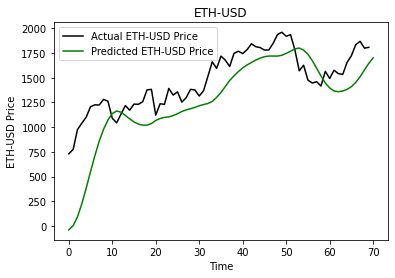

In [84]:
plt.plot(actual_prices, color="black", label=f"Actual {crypto} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {crypto} Price")
plt.title(f"{crypto}")
plt.xlabel('Time')
plt.ylabel(f"{crypto} Price")
plt.legend()
plt.show()

Predict Next Day

In [86]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction:{prediction}")

Prediction:[[1702.337]]
